# NOTES

In [1]:
#multi-layer perceptron model is Artificial Neural Network ANN

In [2]:
#perceptron is known as neuron in short

In [3]:
#layers between input and output are hidden layers

In [4]:
#two or more hidden layers are known as deep neural networks

In [5]:
#a neural network is simply a collection of Neurons(also known as activations)

In [6]:
#The Universal Approximation Theorem tells us that Neural Networks has a kind of universality i.e. no matter what f(x) is,
#there is a network that can approximately approach the result and do the job! 
#This result holds for any number of inputs and outputs.

In [7]:
#an activation function is a function that is added into an artificial neural network
#in order to help the network learn complex patterns in the data.

In [1]:
#rectified linear unit ReLU is equal to zero when less than zero
#when greater than zero it becomes equal to value of z

In [2]:
#The vanishing gradient problem is caused by the derivative of the activation function used to create the neural network. 
#The simplest solution to the problem is to replace the activation function of the network. 
#Instead of sigmoid, use an activation function such as ReLU.

In [6]:
#in multiclass situation output layer has multiple neurons

In [11]:
#A cost function is an important parameter that determines how well a machine learning model performs for a given dataset. 
#It calculates the difference between the expected value and predicted value and represents it as a single real number.

In [7]:
#gradient descent is widely used in machine learning models to find the best parameters that minimize the model's cost function.

In [8]:
#Adam is a replacement optimization algorithm for stochastic gradient descent for training deep learning models. 
#Adam combines the best properties of the AdaGrad and RMSProp algorithms to provide an optimization algorithm 
#that can handle sparse gradients on noisy problems.

In [9]:
#Cross-entropy loss is calculated by taking the difference between our prediction and actual output. 
#We then multiply that value with `-y * ln(y)`. This means we take a negative number, 
#raise it to the power of the logarithm of y (which will be positive), and then subtract this from our original calculation.

In [10]:
#Back-propagation is the essence of neural net training. 
#It is the practice of fine-tuning the weights of a neural net based on the error rate (i.e. loss) obtained in the previous epoch (i.e. iteration). 
#Proper tuning of the weights ensures lower error rates, making the model reliable by increasing its generalization.

# TF syntax

# TF syntax

## Preparing the data


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [11]:
pwd

'C:\\Users\\Noman Baig\\Documents\\python-for-data-science-and-machine-learning-bootcamp\\21. Neural networks and  DL'

In [6]:
df = pd.read_csv('../21. Neural networks and  DL/TensorFlow_FILES/DATA/fake_reg.csv')

In [7]:
df.head()

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531


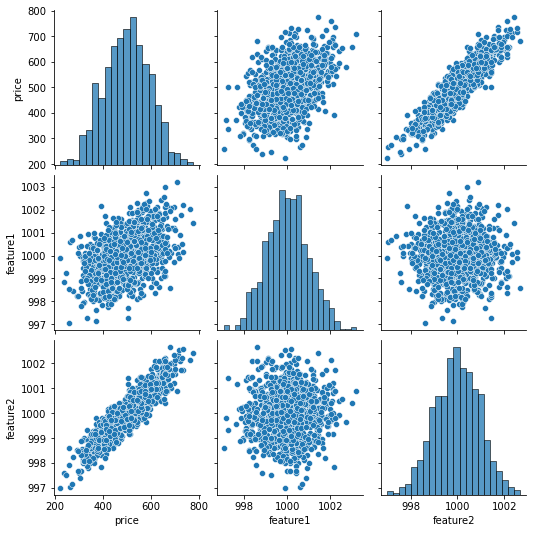

In [12]:
sns.pairplot(df)

In [8]:
pwd

'C:\\Users\\Noman Baig\\Documents\\python-for-data-science-and-machine-learning-bootcamp\\21. Neural networks and  DL'

In [13]:
from sklearn.model_selection import train_test_split    

In [14]:
X = df[['feature1','feature2']].values

In [15]:
y = df['price'].values

array([[ 999.78755752,  999.7660962 ],
       [ 998.86161491, 1001.04240315],
       [1000.07026691,  998.84401463],
       ...,
       [1001.45164617,  998.84760554],
       [1000.77102275,  998.56285086],
       [ 999.2322436 , 1001.45140713]])

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [20]:
X_train.shape

(700, 2)

In [23]:
X_test.shape

(300, 2)

In [28]:
from sklearn.preprocessing import MinMaxScaler

In [29]:
help(MinMaxScaler)

Help on class MinMaxScaler in module sklearn.preprocessing._data:

class MinMaxScaler(sklearn.base._OneToOneFeatureMixin, sklearn.base.TransformerMixin, sklearn.base.BaseEstimator)
 |  MinMaxScaler(feature_range=(0, 1), *, copy=True, clip=False)
 |  
 |  Transform features by scaling each feature to a given range.
 |  
 |  This estimator scales and translates each feature individually such
 |  that it is in the given range on the training set, e.g. between
 |  zero and one.
 |  
 |  The transformation is given by::
 |  
 |      X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
 |      X_scaled = X_std * (max - min) + min
 |  
 |  where min, max = feature_range.
 |  
 |  This transformation is often used as an alternative to zero mean,
 |  unit variance scaling.
 |  
 |  Read more in the :ref:`User Guide <preprocessing_scaler>`.
 |  
 |  Parameters
 |  ----------
 |  feature_range : tuple (min, max), default=(0, 1)
 |      Desired range of transformed data.
 |  
 |  copy : b

In [30]:
scaler = MinMaxScaler()

In [31]:
scaler.fit(X_train)

MinMaxScaler()

In [32]:
X_train = scaler.transform(X_train)

In [33]:
X_test = scaler.transform(X_test)

In [36]:
X_train.max()

1.0

In [37]:
X_train.min()

0.0

## Creating and training model

In [38]:
#stack of layers
from tensorflow.keras.models import Sequential

#layers are made dense
from tensorflow.keras.layers import Dense

In [39]:
help(Sequential)

Help on class Sequential in module keras.engine.sequential:

class Sequential(keras.engine.functional.Functional)
 |  Sequential(layers=None, name=None)
 |  
 |  `Sequential` groups a linear stack of layers into a `tf.keras.Model`.
 |  
 |  `Sequential` provides training and inference features on this model.
 |  
 |  Examples:
 |  
 |  ```python
 |  # Optionally, the first layer can receive an `input_shape` argument:
 |  model = tf.keras.Sequential()
 |  model.add(tf.keras.layers.Dense(8, input_shape=(16,)))
 |  # Afterwards, we do automatic shape inference:
 |  model.add(tf.keras.layers.Dense(4))
 |  
 |  # This is identical to the following:
 |  model = tf.keras.Sequential()
 |  model.add(tf.keras.Input(shape=(16,)))
 |  model.add(tf.keras.layers.Dense(8))
 |  
 |  # Note that you can also omit the `input_shape` argument.
 |  # In that case the model doesn't have any weights until the first call
 |  # to a training/evaluation method (since it isn't yet built):
 |  model = tf.keras.Se

In [40]:
help(Dense)

Help on class Dense in module keras.layers.core.dense:

class Dense(keras.engine.base_layer.Layer)
 |  Dense(units, activation=None, use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None, **kwargs)
 |  
 |  Just your regular densely-connected NN layer.
 |  
 |  `Dense` implements the operation:
 |  `output = activation(dot(input, kernel) + bias)`
 |  where `activation` is the element-wise activation function
 |  passed as the `activation` argument, `kernel` is a weights matrix
 |  created by the layer, and `bias` is a bias vector created by the layer
 |  (only applicable if `use_bias` is `True`). These are all attributes of
 |  `Dense`.
 |  
 |  Note: If the input to the layer has a rank greater than 2, then `Dense`
 |  computes the dot product between the `inputs` and the `kernel` along the
 |  last axis of the `inputs` and axis 0 of the `kern

In [ ]:
#4 is is no. of neurons, like how many neurons are going to be in activation layer

model = Sequential([Dense(4,activation='relu'),
                   Dense(2,activation='relu'),
                   Dense(1,activation='relu')])

In [44]:
#we usually use this pattern to create model incase we want to comment out any layer
model = Sequential()

model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))
#last layer is the single neuron that will actually predict our price
model.add(Dense(1))

#as we are solving regression problem
model.compile(optimizer='rmsprop',loss='mse')

### Choosing an optimizer and loss

Keep in mind what kind of problem you are trying to solve:

    # For a multi-class classification problem
    model.compile(optimizer='rmsprop',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    # For a binary classification problem
    model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    # For a mean squared error regression problem
    model.compile(optimizer='rmsprop',
                  loss='mse')

In [45]:
#see the loss is reducing gradually till the end
model.fit(x=X_train,y=y_train,epochs=250)

Epoch 1/250
22/22 [==============================] - 2s 4ms/step - loss: 256448.3906
Epoch 2/250
22/22 [==============================] - 0s 5ms/step - loss: 256199.1562
Epoch 3/250
22/22 [==============================] - 0s 3ms/step - loss: 255941.9219
Epoch 4/250
22/22 [==============================] - 0s 3ms/step - loss: 255649.1719
Epoch 5/250
22/22 [==============================] - 0s 3ms/step - loss: 255278.9531
Epoch 6/250
22/22 [==============================] - 0s 3ms/step - loss: 254872.3594
Epoch 7/250
22/22 [==============================] - 0s 3ms/step - loss: 254420.8438
Epoch 8/250
22/22 [==============================] - 0s 3ms/step - loss: 253922.1719
Epoch 9/250
22/22 [==============================] - 0s 3ms/step - loss: 253369.4844
Epoch 10/250
22/22 [==============================] - 0s 3ms/step - loss: 252760.2969
Epoch 11/250
22/22 [==============================] - 0s 2ms/step - loss: 252084.0156
Epoch 12/250
22/22 [==============================] - 0s 3ms/st

22/22 [==============================] - 0s 2ms/step - loss: 674.8507
Epoch 98/250
22/22 [==============================] - 0s 2ms/step - loss: 642.3596
Epoch 99/250
22/22 [==============================] - 0s 2ms/step - loss: 616.9254
Epoch 100/250
22/22 [==============================] - 0s 2ms/step - loss: 588.2193
Epoch 101/250
22/22 [==============================] - 0s 2ms/step - loss: 560.0920
Epoch 102/250
22/22 [==============================] - 0s 2ms/step - loss: 535.0849
Epoch 103/250
22/22 [==============================] - 0s 2ms/step - loss: 507.1389
Epoch 104/250
22/22 [==============================] - 0s 2ms/step - loss: 480.5556
Epoch 105/250
22/22 [==============================] - 0s 2ms/step - loss: 455.7331
Epoch 106/250
22/22 [==============================] - 0s 2ms/step - loss: 429.3770
Epoch 107/250
22/22 [==============================] - 0s 2ms/step - loss: 402.7470
Epoch 108/250
22/22 [==============================] - 0s 2ms/step - loss: 383.0865
Epoch 10

22/22 [==============================] - 0s 2ms/step - loss: 24.4714
Epoch 196/250
22/22 [==============================] - 0s 2ms/step - loss: 24.5968
Epoch 197/250
22/22 [==============================] - 0s 2ms/step - loss: 24.2323
Epoch 198/250
22/22 [==============================] - 0s 3ms/step - loss: 24.3552
Epoch 199/250
22/22 [==============================] - 0s 3ms/step - loss: 24.5711
Epoch 200/250
22/22 [==============================] - 0s 3ms/step - loss: 24.4482
Epoch 201/250
22/22 [==============================] - 0s 3ms/step - loss: 24.1683
Epoch 202/250
22/22 [==============================] - 0s 3ms/step - loss: 24.8399
Epoch 203/250
22/22 [==============================] - 0s 2ms/step - loss: 23.9539
Epoch 204/250
22/22 [==============================] - 0s 2ms/step - loss: 24.2270
Epoch 205/250
22/22 [==============================] - 0s 2ms/step - loss: 24.4568
Epoch 206/250
22/22 [==============================] - 0s 2ms/step - loss: 24.5901
Epoch 207/250
22/2

In [46]:
model.history.history

{'loss': [256448.390625,
  256199.15625,
  255941.921875,
  255649.171875,
  255278.953125,
  254872.359375,
  254420.84375,
  253922.171875,
  253369.484375,
  252760.296875,
  252084.015625,
  251334.875,
  250510.90625,
  249590.46875,
  248580.5,
  247466.40625,
  246238.015625,
  244883.40625,
  243405.828125,
  241779.015625,
  239993.484375,
  238061.78125,
  235957.671875,
  233666.71875,
  231214.53125,
  228559.5625,
  225710.96875,
  222655.75,
  219393.390625,
  215922.875,
  212229.390625,
  208287.265625,
  204159.453125,
  199811.203125,
  195181.1875,
  190325.1875,
  185214.65625,
  179910.609375,
  174373.078125,
  168595.9375,
  162591.46875,
  156373.703125,
  149939.328125,
  143285.953125,
  136461.703125,
  129543.078125,
  122412.4140625,
  115138.71875,
  107770.8828125,
  100258.6953125,
  92728.21875,
  85182.2578125,
  77671.9453125,
  70203.03125,
  62811.66796875,
  55604.60546875,
  48544.24609375,
  41788.05859375,
  35288.79296875,
  29175.671875,
  234

In [48]:
loss_df = pd.DataFrame(model.history.history)

In [49]:
loss_df.head()

,loss
0,256448.390625
1,256199.156250
2,255941.921875
3,255649.171875
4,255278.953125


<AxesSubplot:>

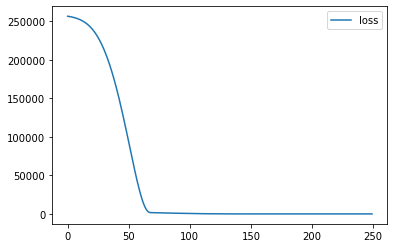

In [50]:
loss_df.plot()

## Model Evaluation

In [51]:
#verbose=0 means you dont want to see the output of backend process when you run cell here.
model.evaluate(X_test,y_test,verbose=0)

25.246601104736328

In [52]:
model.evaluate(X_train,y_train,verbose=0)

24.704425811767578

In [53]:
model.predict(X_test)

10/10 [==============================] - 0s 3ms/step


array([[404.6812 ],
       [622.8051 ],
       [591.41235],
       [571.52826],
       [366.0436 ],
       [578.4725 ],
       [514.3937 ],
       [458.46295],
       [548.5603 ],
       [446.8808 ],
       [611.05786],
       [548.2413 ],
       [418.4845 ],
       [408.26236],
       [650.47766],
       [436.66867],
       [507.7734 ],
       [659.18756],
       [661.83154],
       [564.83136],
       [333.66702],
       [444.20346],
       [381.93622],
       [378.16135],
       [565.8947 ],
       [609.8724 ],
       [531.7111 ],
       [427.23764],
       [654.69946],
       [413.46295],
       [442.00125],
       [484.47354],
       [437.78598],
       [681.0865 ],
       [424.12973],
       [417.07632],
       [501.24924],
       [549.78235],
       [509.07523],
       [394.7672 ],
       [617.85706],
       [416.0097 ],
       [603.7239 ],
       [445.31894],
       [501.32535],
       [580.9915 ],
       [668.23016],
       [489.74033],
       [318.0148 ],
       [484.77414],


In [54]:
test_predictions = model.predict(X_test)

10/10 [==============================] - 0s 2ms/step


In [55]:
test_predictions

array([[404.6812 ],
       [622.8051 ],
       [591.41235],
       [571.52826],
       [366.0436 ],
       [578.4725 ],
       [514.3937 ],
       [458.46295],
       [548.5603 ],
       [446.8808 ],
       [611.05786],
       [548.2413 ],
       [418.4845 ],
       [408.26236],
       [650.47766],
       [436.66867],
       [507.7734 ],
       [659.18756],
       [661.83154],
       [564.83136],
       [333.66702],
       [444.20346],
       [381.93622],
       [378.16135],
       [565.8947 ],
       [609.8724 ],
       [531.7111 ],
       [427.23764],
       [654.69946],
       [413.46295],
       [442.00125],
       [484.47354],
       [437.78598],
       [681.0865 ],
       [424.12973],
       [417.07632],
       [501.24924],
       [549.78235],
       [509.07523],
       [394.7672 ],
       [617.85706],
       [416.0097 ],
       [603.7239 ],
       [445.31894],
       [501.32535],
       [580.9915 ],
       [668.23016],
       [489.74033],
       [318.0148 ],
       [484.77414],


In [56]:
#first convert predictions into series
test_predictions = pd.Series(test_predictions.reshape(300,))

In [57]:
test_predictions

0      404.681213
1      622.805115
2      591.412354
3      571.528259
4      366.043610
          ...    
295    528.370972
296    514.681030
297    608.923645
298    416.333527
299    410.269165
Length: 300, dtype: float32

In [58]:
pred_df = pd.DataFrame(y_test,columns=['Test True Y'])

In [59]:
pred_df

,Test True Y
0,402.296319
1,624.156198
2,582.455066
3,578.588606
4,371.224104
...,...
295,525.704657
296,502.909473
297,612.727910
298,417.569725


In [60]:
pred_df = pd.concat([pred_df,test_predictions],axis=1)

In [62]:
pred_df.columns= ['Test true Y','Model Predictions']

In [63]:
pred_df

,Test true Y,Model Predictions
0,402.296319,404.681213
1,624.156198,622.805115
2,582.455066,591.412354
3,578.588606,571.528259
4,371.224104,366.043610
...,...,...
295,525.704657,528.370972
296,502.909473,514.681030
297,612.727910,608.923645
298,417.569725,416.333527


<AxesSubplot:xlabel='Test true Y', ylabel='Model Predictions'>

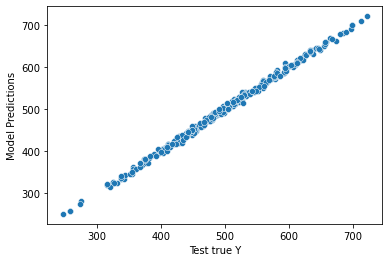

In [65]:
#straight line means our model has performed pretty well
sns.scatterplot(x='Test true Y',y='Model Predictions',data=pred_df)

In [66]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [67]:
#means on average i'm 4$ off from my price point
mean_absolute_error(pred_df['Test true Y'],pred_df['Model Predictions'])

4.022276227828688

In [68]:
df.describe()

,price,feature1,feature2
count,1000.000000,1000.000000,1000.000000
mean,498.673029,1000.014171,999.979847
std,93.785431,0.974018,0.948330
min,223.346793,997.058347,996.995651
25%,433.025732,999.332068,999.316106
50%,502.382117,1000.009915,1000.002243
75%,564.921588,1000.637580,1000.645380
max,774.407854,1003.207934,1002.666308


In [69]:
#mean squared error will output same as model.evaluate

mean_squared_error(pred_df['Test true Y'],pred_df['Model Predictions'])

25.24661015515808

In [70]:
#add **0.5 in the end to get result of root mean squared error
mean_squared_error(pred_df['Test true Y'],pred_df['Model Predictions'])**0.5

5.024600497070198